In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys,inspect
sys.path.insert(0,"..") 
from glob import glob
from os.path import exists, join

import matplotlib.pyplot as plt
import numpy as np
import torch
import argparse
import skimage.transform
import sklearn.metrics
import torchvision
import pickle
import pandas as pd

In [3]:
#!wget "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE67602&format=file&file=GSE67602%5FJoost%5Fet%5Fal%5Fexpression%2Etxt%2Egz" -O "GSE67602_Joost_et_al_expression.txt.gz"


In [4]:
data = pd.read_csv("GSE67602_Joost_et_al_expression.txt.gz", sep="\t", index_col="Gene\Cell")

In [5]:
data = data.T

In [6]:
data.head(2)

Gene\Cell,ERCC-00002,ERCC-00003,ERCC-00004,ERCC-00009,ERCC-00012,ERCC-00013,ERCC-00014,ERCC-00016,ERCC-00017,ERCC-00019,...,r_MARINER1_EC,r_HERVL32-int,r_Tigger1a_Mars,r_(CATCG)n,r_(CGTTG)n,r_MurSAT1,r_HY5,r_tRNA-Arg-CGA_,r_U14,r_(CGTAG)n
1772067055_A01,363,20,276,25,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1772067055_A03,330,17,258,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# import sklearn, sklearn.manifold
# X_embedded = sklearn.manifold.TSNE(n_components=2).fit_transform(data)
# X_embedded.shape

In [9]:
# import umap
# reducer = umap.UMAP()
# X_embedded = reducer.fit_transform(data)
# X_embedded.shape

In [68]:
import sklearn.metrics

In [70]:
d = sklearn.metrics.pairwise_distances(data.values)

In [74]:
import networkx as nx

In [77]:
G = nx.from_numpy_matrix(d)

In [ ]:
nx.draw(G)

/Users/ieee8023/Library/Python/3.7/lib/python/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


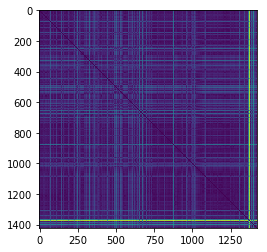

In [73]:
plt.imshow(d)

In [10]:
# plt.figure(0, figsize=(8, 8))
# plt.scatter(X_embedded[:,0], X_embedded[:,1],s=10, c=data["Actb"]);

In [169]:
#ffmpeg -y -i images/group-%d-test.png -vcodec libx264 aout.mp4
def imshow_save(matrix, name, i): 
    plt.rcParams['figure.figsize'] = (7, 7)
    toplot = target.cpu().detach().numpy()
    plt.imshow(matrix)
    if not os.path.exists('images'): 
        os.mkdir('images')
    plt.savefig('images/' + name + "-" + str(i) + '.png', bbox_inches='tight', pad_inches=0);
    plt.clf()
    
def scatter_save(X_embedded, name, i, c=None): 
    plt.rcParams['figure.figsize'] = (7, 7)
    toplot = target.cpu().detach().numpy()
    
    plt.scatter(X_embedded[:,0], X_embedded[:,1],s=10, c=c);
    if not os.path.exists('images'): 
        os.mkdir('images')
    plt.savefig('images/' + name + "-" + str(i) + '.png', bbox_inches='tight', pad_inches=0);
    plt.clf()

In [26]:
device = "cpu"

In [102]:
import numpy as np 
import pandas as pd
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from scipy.spatial.distance import pdist, squareform

In [151]:
source = torch.Tensor(data.values).to(device)
source = source[:50]
source.shape

torch.Size([50, 26024])

In [152]:
label = data["Actb"][:50]

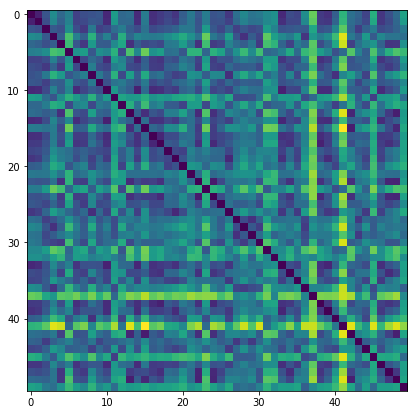

In [153]:
dist = torch.pdist(source).detach().numpy()
sf = squareform(dist)
plt.imshow(sf);

In [170]:
target = torch.randn(source.shape[0],2).requires_grad_().to(device)
#target = torch.Tensor(target).requires_grad_().to(device)
target.shape

torch.Size([50, 2])

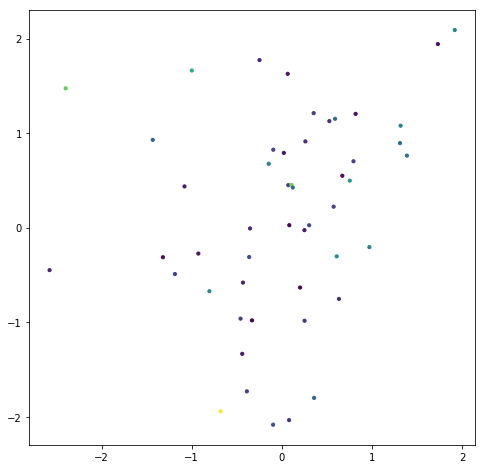

In [171]:
X_embedded = target.detach().numpy()

plt.figure(0, figsize=(8, 8))
plt.scatter(X_embedded[:,0], X_embedded[:,1],s=10, c=label);

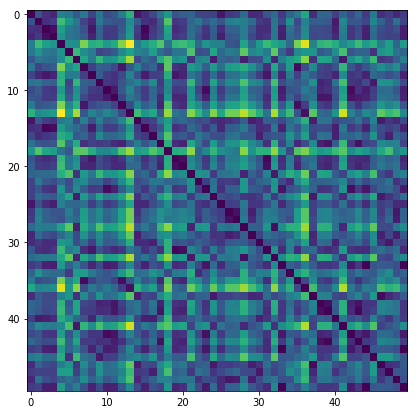

In [172]:
dist = torch.pdist(target).detach().numpy()
sf = squareform(dist)
plt.imshow(sf);

In [173]:
optimizer = torch.optim.Adam([target], lr=0.5)
i=0
source_dist = torch.pdist(source)
!rm images/*

In [176]:
for i in range(i,300):
    for k in range(10):
        optimizer.zero_grad()
        target_dist = torch.pdist(target)
        dloss = (((target_dist - source_dist)**2)/(source_dist+1)).sum()

        #dloss_target = torch.zeros(1)

        loss = dloss# + dloss_target*dloss# + dt.sum()*dloss

        loss.backward()
        optimizer.step()

    print(".", end = '')
    scatter_save(target.detach().numpy(), "targets", i, c=label);
print("Done")
    

.....................................................................................................Done


<Figure size 504x504 with 0 Axes>

In [177]:
!ffmpeg -hide_banner -loglevel panic -y -i images/targets-%d.png -vcodec libx264 aout.mp4
from IPython.display import Video
Video("aout.mp4")